<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [4]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 64 kB 3.5 MB/s             


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [7]:
dict_={'a':[11,21,31],'b':[12,22,32]}
print(dict)

<class 'dict'>


When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [8]:
import pandas as pd
dict_={'a':[11,21,31],'b':[12,22,32]}
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [3]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [9]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [13]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()


bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)


In [14]:
type(bitcoin_data)

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [15]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1639684875673, 47869.71735116278],
 [1639688503045, 48132.30906342209],
 [1639692308228, 48152.01056813714],
 [1639695811593, 47990.49542321248],
 [1639699257576, 47694.530502251764]]

Finally lets turn this data into a Pandas DataFrame.


In [23]:


data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1639684875673,47869.717351
1,1639688503045,48132.309063
2,1639692308228,48152.010568
3,1639695811593,47990.495423
4,1639699257576,47694.530502
...,...,...
717,1642262426503,43495.445134
718,1642266137207,43448.406847
719,1642269873560,43593.936775
720,1642273652736,43418.608633


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [26]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data


,TimeStamp,Price,date
0,1639684875673,47869.717351,2021-12-16
1,1639688503045,48132.309063,2021-12-16
2,1639692308228,48152.010568,2021-12-16
3,1639695811593,47990.495423,2021-12-16
4,1639699257576,47694.530502,2021-12-17
...,...,...,...
717,1642262426503,43495.445134,2022-01-15
718,1642266137207,43448.406847,2022-01-15
719,1642269873560,43593.936775,2022-01-15
720,1642273652736,43418.608633,2022-01-15


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [28]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2021-12-16  47869.717351  48152.010568  47869.717351  47990.495423
1   2021-12-17  45916.301854  47961.123755  47694.530502  46507.965043
2   2021-12-18  45826.547077  47337.122322  46328.696365  46841.495106
3   2021-12-19  46598.200656  48055.747690  46970.057051  47519.780235
4   2021-12-20  45723.105159  47446.940449  46807.048616  47033.223559
5   2021-12-21  47046.020323  49341.618017  47117.008204  49341.618017
6   2021-12-22  48886.990554  49716.031100  49058.238863  49101.859467
7   2021-12-23  48316.724166  51290.704509  48755.895644  50934.226060
8   2021-12-24  50844.542855  51792.359254  50927.613933  50844.542855
9   2021-12-25  50685.006227  51208.601003  50888.721037  50726.187211
10  2021-12-26  49789.473916  51097.345701  50478.270128  51097.345701
11  2021-12-27  50621.897547  51956.630210  50868.792929  50962.025868
12  2021-12-28  47618.191595  50774.067815  50774.067815  47722.598011
13  2021-12-29  46961.799723  48197.198418  47725.148046  47396.276964
14  2021-12-30  46574.822813  47944.914013  46574.822813  47092.110757
15  2021-12-31  45921.910455  48634.694887  47191.868390  46422.824218
16  2022-01-01  46319.651088  48033.245249  46319.651088  47506.772711
17  2022-01-02  46756.895154  47861.455405  47816.077676  47406.938417
18  2022-01-03  45966.439847  47503.756211  47371.107791  46280.983265
19  2022-01-04  45794.698823  47507.693657  46531.140861  46164.781388
20  2022-01-05  43265.684197  46928.921658  45938.024272  43265.684197
21  2022-01-06  42703.360564  43847.688673  43526.036994  43275.913391
22  2022-01-07  41119.024408  43216.458677  43216.458677  41585.022892
23  2022-01-08  40655.249086  42240.087067  41527.197043  42003.669459
24  2022-01-09  41558.217810  42755.763348  41756.662324  42218.571266
25  2022-01-10  40683.269658  42409.439494  41862.360986  41656.505043
26  2022-01-11  41628.032996  43161.267203  41890.545240  42836.282931
27  2022-01-12  42590.282254  44142.956170  42811.149099  43933.947990
28  2022-01-13  42641.775744  44046.084366  43981.877327  42641.775744
29  2022-01-14  42024.696613  43494.768268  42608.410012  43433.833195
30  2022-01-15  42669.966529  43735.120143  43191.970778  43735.120143

Finally we are now ready to use plotly to create our Candlestick Chart.


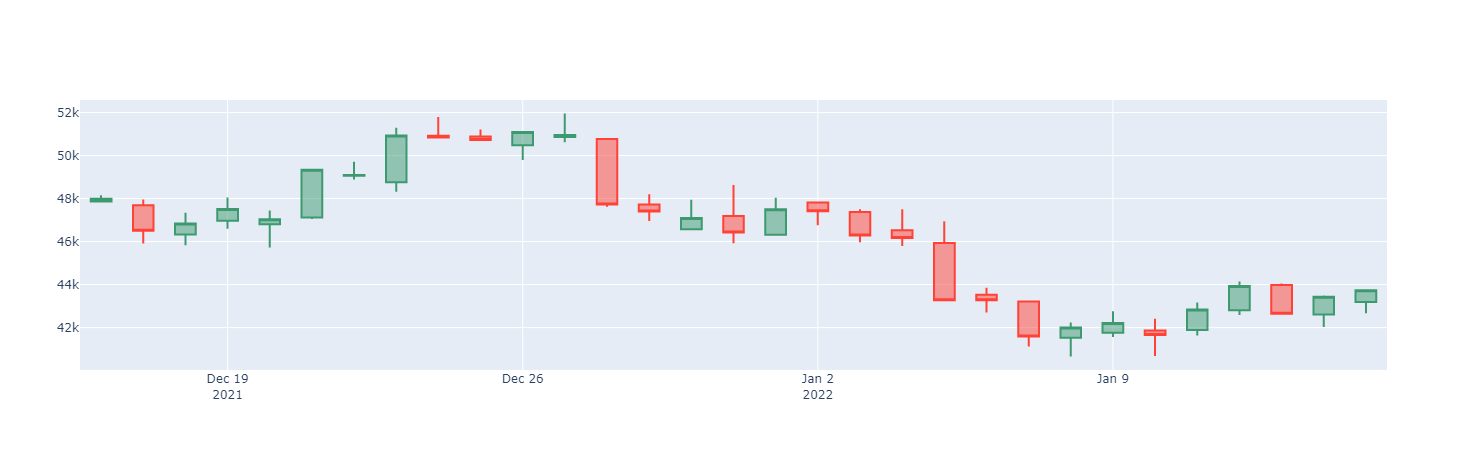

In [29]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
